In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from optimize import fit_data
import optimize
from new_wave import get_transition_points

In [2]:
# Import data
data = pd.read_csv("../Datasets/normandy_hosp.csv") 
city_name = 'Normandy' 

In [3]:
# try:
#     #deaths
#     acc_data = data.cumulative_deceased
# except(AttributeError):
#     # cases
#     acc_data = data.total_confirmed

# normalized_acc_data = acc_data / max(acc_data)
# t = np.linspace(0, len(acc_data)-1, len(acc_data))

# normalized_acc_data = normalized_acc_data.tolist()
# daily_data = data.new_deceased.tolist()

In [4]:
daily_data = data.current_hospitalized_patients.tolist()
acc_data = []
for i in range(len(daily_data)):
    acc_data.append(np.sum(daily_data[:i]))

acc_data = np.array(acc_data)
normalized_acc_data = acc_data / max(acc_data)
t = np.linspace(0, len(acc_data)-1, len(acc_data))


In [5]:
# Initial Conditions

def initial_cond_0(y_t):
    A0 = 100
    #A0 = 2*max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    tp0 += 110 
    A0 *= 0.005
    return [A0, tp0]
optimize.update_cond = update_cond_nw

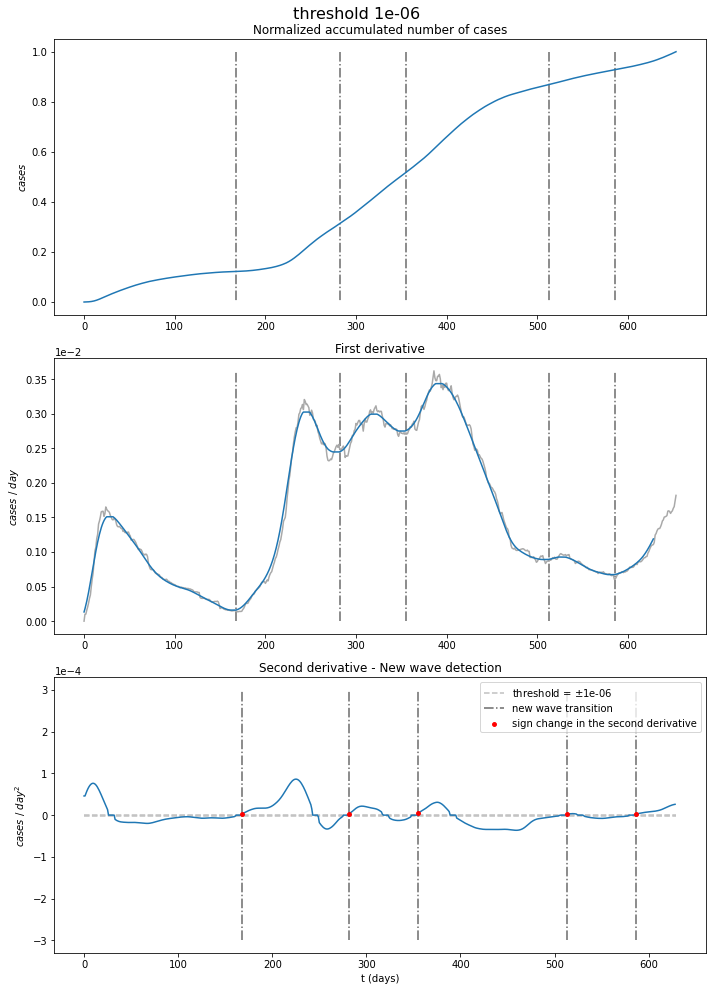

========= Wave nr 1 =========
From 0 to  154


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


rRMSE:  0.010004053949040168
rRMSE Predictions:  0.021695447051613508
Parameters: [[55554.800915826905, 31.071944554791212, 41.3337888981109, -0.4715489707904421]]
========= Wave nr 2 =========
From 0 to  268


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


rRMSE:  0.003573291614212487
rRMSE Predictions:  0.03765124952532383
Parameters: [[55554.800915826905, 31.071944554791212, 41.3337888981109, -0.4715489707904421], [78000.80916009174, 247.2389913453205, 10.637622989283226, 1.8257852199662672]]
========= Wave nr 3 =========
From 0 to  341


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


rRMSE:  0.0026845129269167343
rRMSE Predictions:  0.02182987459821359
Parameters: [[55554.800915826905, 31.071944554791212, 41.3337888981109, -0.4715489707904421], [78000.80916009174, 247.2389913453205, 10.637622989283226, 1.8257852199662672], [114335.4072742387, 310.35840596534183, 30.70354220247357, -4.0742729646051475e-05]]
========= Wave nr 4 =========
From 0 to  499


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


rRMSE:  0.0012609150697895693
rRMSE Predictions:  0.0041890281547047985
Parameters: [[55554.800915826905, 31.071944554791212, 41.3337888981109, -0.4715489707904421], [78000.80916009174, 247.2389913453205, 10.637622989283226, 1.8257852199662672], [114335.4072742387, 310.35840596534183, 30.70354220247357, -4.0742729646051475e-05], [148361.05953813647, 400.9111393622289, 40.368692723076784, 0.031738729426125274]]


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


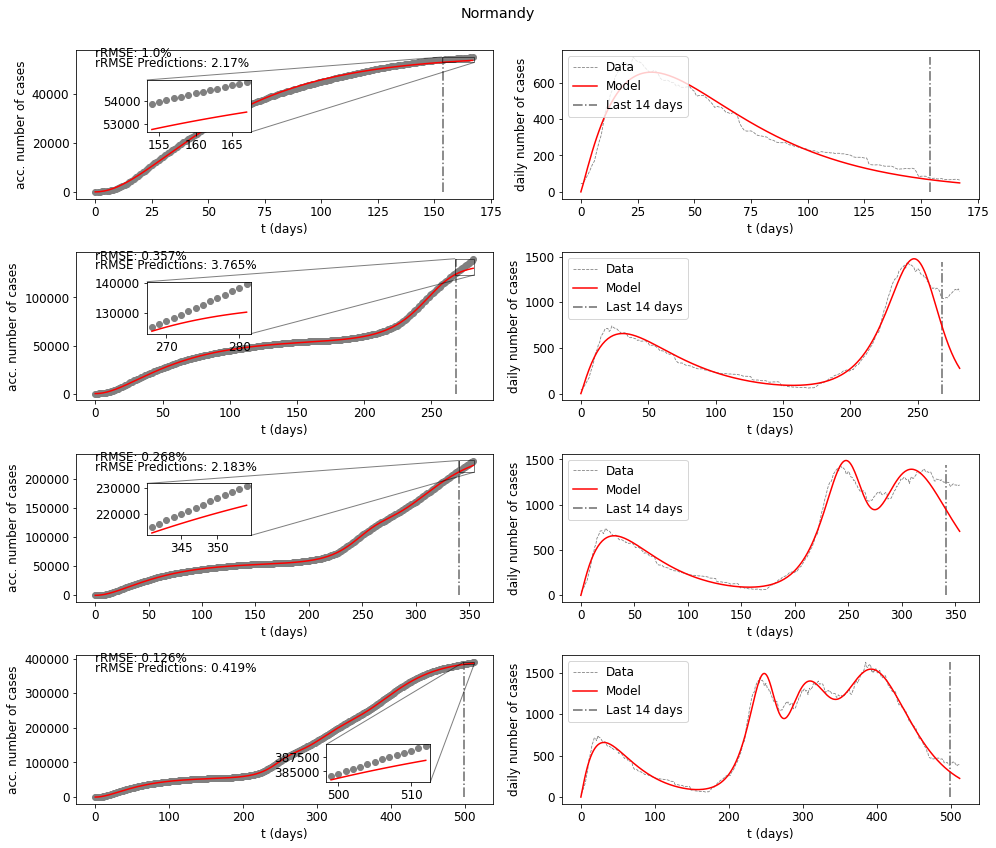

new_wave_detection:  [168, 282, 355, 513]


In [6]:
# Transition Points
x_nw = get_transition_points(acc_data, visual=True, threshold=1e-6)[:4]

optimize.fit_data(acc_data, daily_data, city_name, x_nw)
print('new_wave_detection: ', x_nw)